In [1]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 54.8 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
# import os
# os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'max_split_size_mb=10'

In [ ]:
# !echo $PYTORCH_CUDA_ALLOC_CONF

In [2]:
!nvidia-smi

Wed Sep 20 12:59:47 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    24W / 300W |      0MiB / 16384MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# del os.environ['PYTORCH_CUDA_ALLOC_CONF']

In [3]:
!git clone https://github.com/huggingface/diffusers
%cd diffusers
!pip install -e .

Cloning into 'diffusers'...
remote: Enumerating objects: 37650, done.
remote: Counting objects: 100% (9061/9061), done.
remote: Compressing objects: 100% (1064/1064), done.
remote: Total 37650 (delta 8485), reused 8181 (delta 7906), pack-reused 28589
Receiving objects: 100% (37650/37650), 24.92 MiB | 24.72 MiB/s, done.
Resolving deltas: 100% (27838/27838), done.
/content/diffusers
Obtaining file:///content/diffusers
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 15.9 MB/s eta 0:00:00
  Building editable for diffusers (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.22.0.dev0-0.editable-py3-none-any.whl size=10643 sha256=9d96ec9784ef699362b844160ba6c79d21299dfd52f0

In [4]:
%cd examples/dreambooth

/content/diffusers/examples/dreambooth


In [5]:
!pip install -r requirements_sdxl.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.1/258.1 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 34.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 83.1 MB/s eta 0:00:00


In [6]:
!pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.5/189.5 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.8/224.8 kB 22.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.4 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8791 sha256=9f5b38d8db3eb2db5a6885f789649e32d427f45b9a1ba87d08ed53767567ff44
  Stored in directory: /root/.cache/pip/wheels/e7/f3/22/152153d6eb222ee7a56ff8617d80ee5207207a8c00a7aab794
Successfully built pathtools


In [7]:
!pip install bitsandbytes>=0.40.0 xformers>=0.0.20

In [8]:
import os
# os.listdir("./lora-trained-xl")
print(os.path.abspath('.'))

/content/diffusers/examples/dreambooth


In [9]:
!wandb login

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [18]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|
    
    A token is already saved on your machine. Run `huggingface-cli whoami` to get more information or `huggingface-cli logout` if you want to log out.
    Setting a new token will erase the existing one.
    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: 
Add token as git credential? (Y/n) n
Token is valid (permission: write).
Your token has been saved to /roo

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
from PIL import Image

def image_grid(imgs, rows, cols, resize=256):
    assert len(imgs) == rows * cols

    if resize is not None:
        imgs = [img.resize((resize, resize)) for img in imgs]
    w, h = imgs[0].size
    grid = Image.new("RGB", size=(cols * w, rows * h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i % cols * w, i // cols * h))
    return grid

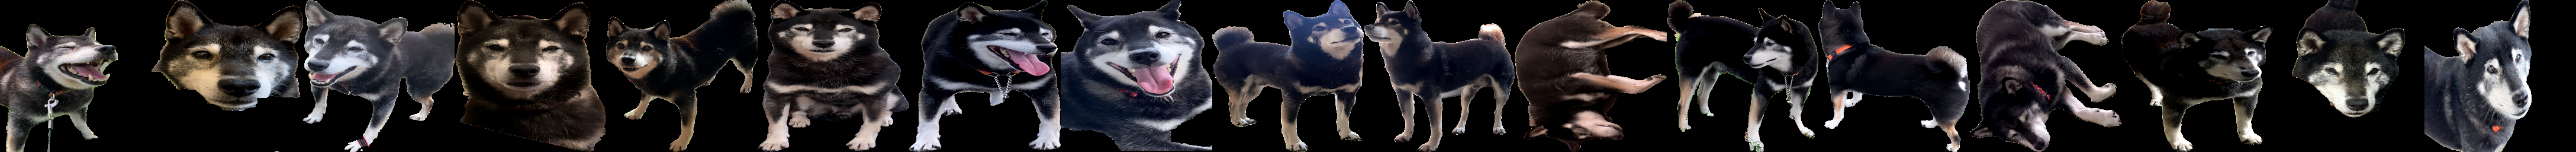

In [14]:
import glob

imgs = [Image.open(path) for path in glob.glob("/content/drive/MyDrive/img/200_raizo_kuro_shiba/*")]
image_grid(imgs, 1, 17)

In [ ]:
# local_dir = "/content/drive/MyDrive/dog"
# os.mkdir(local_dir)
# os.mkdir("lora-trained-xl")

In [ ]:
# from huggingface_hub import snapshot_download

# snapshot_download(
#     "diffusers/dog-example",
#     local_dir=local_dir, repo_type="dataset",
#     ignore_patterns=".gitattributes",
# )

Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

'/content/drive/MyDrive/dog'

In [15]:
from accelerate.utils import write_basic_config
write_basic_config()

PosixPath('/root/.cache/huggingface/accelerate/default_config.yaml')

In [16]:
!accelerate config

In which compute environment are you running?
Please input a choice index (starting from 0), and press enter
 ➔  This machine
    AWS (Amazon SageMaker)

This machine
Which type of machine are you using?
Please input a choice index (starting from 0), and press enter
 ➔  No distributed training
    multi-CPU
    multi-XPU
    multi-GPU
    multi-NPU
    TPU

No distributed training
Do you want to run your training on CPU only (even if a GPU / Apple Silicon / Ascend NPU device is available)? [yes/NO]:NO
Do you wish to optimize your script with torch dynamo?[yes/NO]:NO
Do you want to use DeepSpeed? [yes/NO]: NO
What GPU(s) (by id) should be used for training on this machine as a comma-seperated list? [all]:all
Do you wish to use FP16 or BF16 (mixed precision)?
Please input a choice index (starting from 0), and press enter
 ➔  no
    fp16
    bf16
    fp8
1
fp16
accelerate configuration saved at /root/.cache/huggingface/accelerate/default_config.yaml


In [ ]:
# import torch
# torch.cuda.memory._set_allocator_settings("max_split_size_mb:30")

In [19]:
#!/usr/bin/env bash
!accelerate launch train_dreambooth_lora_sdxl.py \
  --pretrained_model_name_or_path="stabilityai/stable-diffusion-xl-base-1.0" \
  --pretrained_vae_model_name_or_path="madebyollin/sdxl-vae-fp16-fix" \
  --instance_data_dir="/content/drive/MyDrive/img/200_raizo_kuro_shiba" \
  --output_dir="/content/drive/MyDrive/img/lora-sdxl-kuroshiba-raizo" \
  --mixed_precision="fp16" \
  --instance_prompt="a photo of Kuroshiba raizo" \
  --resolution=1024 \
  --train_batch_size=2 \
  --gradient_accumulation_steps=2 \
  --gradient_checkpointing \
  --learning_rate=1e-4 \
  --report_to="wandb" \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --enable_xformers_memory_efficient_attention \
  --mixed_precision="fp16" \
  --use_8bit_adam \
  --max_train_steps=500 \
  --checkpointing_steps=717 \
  --seed="0" \
  --push_to_hub

2023-09-20 13:07:28.579536: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
09/20/2023 13:07:30 - INFO - __main__ - Distributed environment: NO
Num processes: 1
Process index: 0
Local process index: 0
Device: cuda

Mixed precision type: fp16

You are using a model of type clip_text_model to instantiate a model of type . This is not supported for all configurations of models and can yield errors.
You are using a model of type clip_text_model to instantiate a model of type . This is not supported for all configurations of models and can yield errors.
{'clip_sample_range', 'dynamic_thresholding_ratio', 'thresholding', 'variance_type'} was not found in config. Values will be initialized to default values.
{'attention_type', 'dropout'} was not found in config. Values will be initialized to default values.
wandb: Currently logged in as: muson0110. Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.15.10
wandb:

In [26]:
!pip install git+https://github.com/huggingface/diffusers.git -q

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [1]:
!pip uninstall diffusers -y

Found existing installation: diffusers 0.21.2
Uninstalling diffusers-0.21.2:
  Successfully uninstalled diffusers-0.21.2


In [2]:
pip install diffusers

  Using cached diffusers-0.21.2-py3-none-any.whl


In [3]:
import torch

from diffusers import DiffusionPipeline, AutoencoderKL

In [4]:
vae = AutoencoderKL.from_pretrained("madebyollin/sdxl-vae-fp16-fix", torch_dtype=torch.float16)
pipe = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    vae=vae, torch_dtype=torch.float16, variant="fp16",
    use_safetensors=True
)
pipe.load_lora_weights("mussso/lora-sdxl-kuroshiba-raizo")

_ = pipe.to("cuda")

Fetching 17 files:   0%|          | 0/17 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [15]:
prompt = "Concept art of Kuroshiba raizo running between towering skyscrapers on a New York City street corner blue hour neon lighting highly detailed artstation  deviantart impressive scene impressive composition impressive lighting"

images = []
for i in range(10):
  image = pipe(prompt=prompt, num_inference_steps=25).images[0]
  images.append(image)

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

In [29]:
images[10]

IndexError: ignored